# Chapter 5, Example 1b
## Random subsampling to determine the number of hidden neurons

In [1]:
import torch
from torch import nn

from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameters
no_epochs = 1000
lr = 0.1

no_labels = 3
no_features = 4
no_exps = 10

hidden_units = [2, 4, 6, 8, 10, 12]

seed = 10
torch.manual_seed(seed)
np.random.seed(seed)

In [3]:
class FFN(nn.Module):
    def __init__(self, no_features, no_hidden, no_labels):
        super().__init__()
        self.relu_stack = nn.Sequential(
            nn.Linear(no_features, no_hidden),
            nn.ReLU(),
            nn.Linear(no_hidden, no_labels),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        logits = self.relu_stack(x)
        return logits

In [4]:
def train_exp(X, Y):

    x_train, y_train, x_test, y_test = X[:100], Y[:100], X[100:], Y[100:]
    
    acc = []
    for no_hidden in hidden_units:
        
        model = FFN(no_features, no_hidden, no_labels)
    
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)

        for epoch in range(no_epochs):
            pred = model(torch.tensor(x_train, dtype=torch.float))
            loss = loss_fn(pred, torch.tensor(y_train, dtype=torch.float))
            
    
            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        pred = model(torch.tensor(x_test, dtype=torch.float))
        acc_ = (pred.argmax(1) == torch.tensor(y_test, dtype=torch.float).argmax(1)).type(torch.float).mean()
        
        acc.append(acc_.item())
        
    return acc

In [6]:
# input data
iris = datasets.load_iris()
iris.data -= np.mean(iris.data, axis=0)

X = iris.data

no_data = len(iris.data)
# convert the targets into one-hot matrix
Y = np.zeros((no_data, no_labels))
for i in range(no_data):
    Y[i, iris.target[i]] = 1
    

acc = []
idx = np.arange(no_data)
for exp in range(no_exps):
        
    np.random.shuffle(idx)

    acc.append(train_exp(X[idx], Y[idx]))
    print('exp %d, acc %s'%(exp, acc[exp]))

mean_acc = np.mean(np.array(acc), axis = 0)
print("mean accuracy %s"%mean_acc)
print('* optimum hidden units %d *'%hidden_units[np.argmax(mean_acc)])

exp 0, acc [0.9800000190734863, 0.9599999785423279, 0.9800000190734863, 0.9800000190734863, 0.9800000190734863, 1.0]
exp 1, acc [0.9599999785423279, 0.6600000262260437, 0.9599999785423279, 0.9599999785423279, 0.9599999785423279, 0.9800000190734863]
exp 2, acc [0.9200000166893005, 0.8999999761581421, 0.9200000166893005, 0.9200000166893005, 0.9200000166893005, 0.9399999976158142]
exp 3, acc [0.9599999785423279, 0.9599999785423279, 0.9599999785423279, 0.9800000190734863, 0.9599999785423279, 0.9800000190734863]
exp 4, acc [0.9800000190734863, 0.9399999976158142, 0.9800000190734863, 0.9599999785423279, 0.9800000190734863, 0.9599999785423279]
exp 5, acc [0.9800000190734863, 0.9800000190734863, 0.9800000190734863, 0.9800000190734863, 0.9800000190734863, 0.9800000190734863]
exp 6, acc [0.3199999928474426, 0.9800000190734863, 0.9599999785423279, 0.9599999785423279, 0.9599999785423279, 0.9599999785423279]
exp 7, acc [0.8799999952316284, 1.0, 0.9800000190734863, 1.0, 1.0, 0.9800000190734863]
exp 

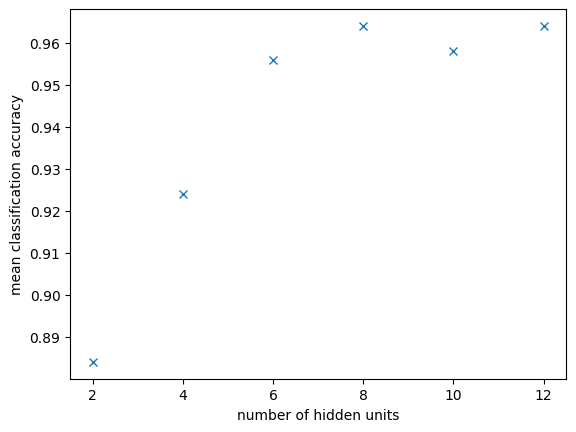

In [7]:
plt.figure(1)
plt.plot(hidden_units, mean_acc, marker = 'x', linestyle = 'None')
plt.xlabel('number of hidden units')
plt.ylabel('mean classification accuracy')
plt.show()